# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory 

- Draw histograms of period distribution 

- Plot amplitude vs period with labels #scattered

- Select ten cell trajectiories with the smallest periods and plot those as a heat map #use sort algorithm

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal
#scipy.fftpack y encontrar la frecuencia dominante

In [42]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task
#We have to see at least 10 peaks on each line

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm']) #we transponse it because in matlab is the opposite
time = np.transpose(data['t'])
print("x :", x)
print("time :", time)

print("x :", x[1])

x : [[0.14373281 0.0983542  0.03060747 ... 0.14890247 0.11990053 0.15699123]
 [0.17566235 0.11149754 0.03309582 ... 0.13476082 0.10938026 0.26057875]
 [0.2050223  0.12391836 0.0355067  ... 0.08996433 0.09629453 0.33119532]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
time : [[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]
 [ 15.]
 [ 18.]
 [ 21.]
 [ 24.]
 [ 27.]
 [ 30.]
 [ 33.]
 [ 36.]
 [ 39.]
 [ 42.]
 [ 45.]
 [ 48.]
 [ 51.]
 [ 54.]
 [ 57.]
 [ 60.]
 [ 63.]
 [ 66.]
 [ 69.]
 [ 72.]
 [ 75.]
 [ 78.]
 [ 81.]
 [ 84.]
 [ 87.]
 [ 90.]
 [ 93.]
 [ 96.]
 [ 99.]
 [102.]
 [105.]
 [108.]
 [111.]
 [114.]
 [117.]
 [120.]
 [123.]
 [126.]
 [129.]
 [132.]
 [135.]
 [138.]
 [141.]
 [144.]
 [147.]
 [150.]
 [153.]
 [156.]
 [159.]
 [162.]
 [165.]
 [168.]
 [171.]
 [174.]
 [177.]
 [180.]
 [183.]
 [186.]
 [189.]
 [192.]
 [195.]
 [198.]
 [201.]
 

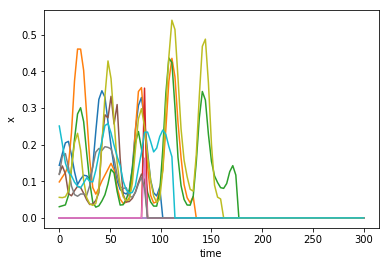

In [2]:
#extract the ten first lines each column is a different cell.
plotter.plot(time, x[:,:10]) #time, x[:,1]
plotter.xlabel('time')
plotter.ylabel('x')
plotter.axis('tight')
plotter.show()


In [3]:
time.shape

(101, 1)

In [4]:
x.shape

(101, 501)

In [5]:
from scipy.signal import find_peaks

h=([])
amplitude=np.zeros(501)
peak=np.zeros(8000)
for i in range (0,501):
    d = x[:,i]
    peaks, _ = find_peaks(d, height =0)
    #plotter.plot(d)
    #plotter.plot(peaks, d[peaks], "d")
    #plotter.plot(np.zeros_like(d), "--", color="gray")
    #plotter.show()
    
    amplitude[i]=np.mean(d[peaks])
    #amplitude=[amplitude,np.mean(d[peaks])]

/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
amplitude

array([0.21722033, 0.29217034, 0.26584087, 0.35456353,        nan,
       0.21191484, 0.16296327, 0.13643792, 0.39734836, 0.21048543,
       0.21160583, 0.27386691, 0.21297613, 0.1854178 , 0.27406711,
       0.26253878, 0.1854178 , 0.2997898 , 0.32483557, 0.33375937,
       0.37374346, 0.24887625,        nan, 0.2703485 , 0.33148867,
       0.21515548, 0.31813031, 0.23353116, 0.15299426, 0.2079524 ,
       0.23410156, 0.29763667, 0.70090341, 0.30421657, 0.29742299,
              nan, 0.09388188, 0.5291104 , 0.2316054 ,        nan,
       0.21191484, 0.34626792, 0.30014499, 0.29488804, 0.03878479,
       0.10561378, 0.1854178 , 0.31613673, 0.3704287 , 0.27916602,
       0.18316149, 0.10561378, 0.21191484, 0.2275461 , 0.28586096,
       0.43085518, 0.1854178 , 0.22644603, 0.37152309, 0.27386691,
       0.20192059, 0.24023171, 0.33500027, 0.26898629,        nan,
              nan, 0.14677161, 0.32387777, 0.21935282, 0.17717354,
       0.34288974, 0.21785568, 0.25775764, 0.26159277, 0.34605

In [6]:
amplitude = np.nan_to_num(amplitude)
amplitude

array([0.21722033, 0.29217034, 0.26584087, 0.35456353, 0.        ,
       0.21191484, 0.16296327, 0.13643792, 0.39734836, 0.21048543,
       0.21160583, 0.27386691, 0.21297613, 0.1854178 , 0.27406711,
       0.26253878, 0.1854178 , 0.2997898 , 0.32483557, 0.33375937,
       0.37374346, 0.24887625, 0.        , 0.2703485 , 0.33148867,
       0.21515548, 0.31813031, 0.23353116, 0.15299426, 0.2079524 ,
       0.23410156, 0.29763667, 0.70090341, 0.30421657, 0.29742299,
       0.        , 0.09388188, 0.5291104 , 0.2316054 , 0.        ,
       0.21191484, 0.34626792, 0.30014499, 0.29488804, 0.03878479,
       0.10561378, 0.1854178 , 0.31613673, 0.3704287 , 0.27916602,
       0.18316149, 0.10561378, 0.21191484, 0.2275461 , 0.28586096,
       0.43085518, 0.1854178 , 0.22644603, 0.37152309, 0.27386691,
       0.20192059, 0.24023171, 0.33500027, 0.26898629, 0.        ,
       0.        , 0.14677161, 0.32387777, 0.21935282, 0.17717354,
       0.34288974, 0.21785568, 0.25775764, 0.26159277, 0.34605

In [7]:
peak=[]
for i in range (0,501):
    d = x[:,i]
    peaks, _ = find_peaks(d, height =0)
    #plotter.plot(d)
    #plotter.plot(peaks, d[peaks], "d")
    #plotter.plot(np.zeros_like(d), "--", color="gray")
    
    peak.append(peaks)

In [8]:
peak[0]

array([ 3,  8, 14, 27, 33])

In [9]:
#hay que sacar las medias de los periodos :)
#peak=np.array

#ESTE EL VECTOR DEL PERIODO QUE HE METIDO, SÓLO HE HECHO UNOS POCOS CAMBIOS DE LO QUE HABÍA ANTES
period=[]
for i in range (0,501):
    difvector=[]
    for j in range(len(peak[i])-1):
        dif = (peak[i][j+1]-peak[i][j])
        difvector.append(dif)
    period.append(np.mean(difvector))
        
    

/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
period [0]

7.5

In [11]:
periodtime = np.array(period) 
periodtime = np.nan_to_num(periodtime) #esto transforma los nan en valores = 0
periodtime

array([ 7.5       ,  9.5       , 10.        ,  0.        ,  0.        ,
        5.2       ,  0.        ,  5.        , 10.5       ,  8.33333333,
        8.        ,  0.        ,  0.        ,  9.        , 10.5       ,
        7.        ,  9.        , 10.        ,  9.5       , 10.5       ,
        9.66666667,  9.        ,  0.        ,  4.5       ,  9.75      ,
        6.33333333,  8.25      ,  6.5       ,  8.        ,  7.66666667,
        8.        ,  8.66666667,  9.33333333,  8.        , 10.        ,
        0.        ,  8.2       , 12.5       , 10.        ,  0.        ,
        5.2       , 12.        , 11.5       , 13.        ,  0.        ,
        8.        ,  9.        ,  8.42857143,  8.71428571,  9.5       ,
        8.33333333,  8.        ,  5.2       ,  6.66666667,  6.75      ,
       10.        ,  9.        , 10.        , 10.5       ,  0.        ,
        6.        ,  9.        , 13.        , 10.        ,  0.        ,
        0.        ,  9.        , 10.66666667,  9.33333333,  8.66

(array([110.,   0.,   1.,   0.,   0.,   2.,   1.,   6.,   6.,  12.,  19.,
         30.,  58.,  62.,  87.,  67.,  18.,  13.,   6.,   3.]),
 array([ 0.   ,  0.675,  1.35 ,  2.025,  2.7  ,  3.375,  4.05 ,  4.725,
         5.4  ,  6.075,  6.75 ,  7.425,  8.1  ,  8.775,  9.45 , 10.125,
        10.8  , 11.475, 12.15 , 12.825, 13.5  ]),
 <a list of 20 Patch objects>)

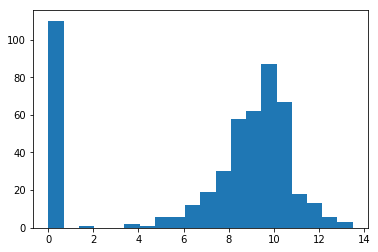

In [12]:
#Draw histograms of period distribution
plotter.hist(periodtime, bins=20)

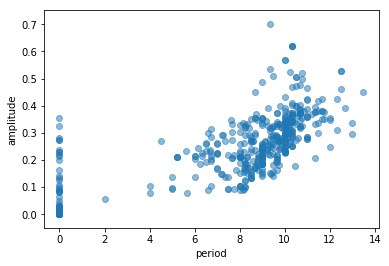

In [13]:
#Plot amplitude vs period with labels
from sklearn.datasets import load_iris
iris = load_iris()

plotter.scatter(periodtime, amplitude, alpha=0.5, cmap='viridis') 
plotter.xlabel("period")
plotter.ylabel("amplitude");

In [16]:
#Select ten cell trajectiories with the smallest periods 
freq = 1/periodtime
freq

/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([0.13333333, 0.10526316, 0.1       ,        inf,        inf,
       0.19230769,        inf, 0.2       , 0.0952381 , 0.12      ,
       0.125     ,        inf,        inf, 0.11111111, 0.0952381 ,
       0.14285714, 0.11111111, 0.1       , 0.10526316, 0.0952381 ,
       0.10344828, 0.11111111,        inf, 0.22222222, 0.1025641 ,
       0.15789474, 0.12121212, 0.15384615, 0.125     , 0.13043478,
       0.125     , 0.11538462, 0.10714286, 0.125     , 0.1       ,
              inf, 0.12195122, 0.08      , 0.1       ,        inf,
       0.19230769, 0.08333333, 0.08695652, 0.07692308,        inf,
       0.125     , 0.11111111, 0.11864407, 0.1147541 , 0.10526316,
       0.12      , 0.125     , 0.19230769, 0.15      , 0.14814815,
       0.1       , 0.11111111, 0.1       , 0.0952381 ,        inf,
       0.16666667, 0.11111111, 0.07692308, 0.1       ,        inf,
              inf, 0.11111111, 0.09375   , 0.10714286, 0.11538462,
       0.09756098, 0.11111111, 0.14285714, 0.15384615, 0.09677

In [20]:
#voy a cambiar los infinitos por el número de menor valor de nuestro freq y luego seleccionaré los 10 con mayor frecuencia
import pandas as pd

pd.options.mode.use_inf_as_na = True
df = pd.DataFrame(data=freq)
df.fillna(df.min(),inplace=True)

In [21]:
freq

array([0.13333333, 0.10526316, 0.1       , 0.07407407, 0.07407407,
       0.19230769, 0.07407407, 0.2       , 0.0952381 , 0.12      ,
       0.125     , 0.07407407, 0.07407407, 0.11111111, 0.0952381 ,
       0.14285714, 0.11111111, 0.1       , 0.10526316, 0.0952381 ,
       0.10344828, 0.11111111, 0.07407407, 0.22222222, 0.1025641 ,
       0.15789474, 0.12121212, 0.15384615, 0.125     , 0.13043478,
       0.125     , 0.11538462, 0.10714286, 0.125     , 0.1       ,
       0.07407407, 0.12195122, 0.08      , 0.1       , 0.07407407,
       0.19230769, 0.08333333, 0.08695652, 0.07692308, 0.07407407,
       0.125     , 0.11111111, 0.11864407, 0.1147541 , 0.10526316,
       0.12      , 0.125     , 0.19230769, 0.15      , 0.14814815,
       0.1       , 0.11111111, 0.1       , 0.0952381 , 0.07407407,
       0.16666667, 0.11111111, 0.07692308, 0.1       , 0.07407407,
       0.07407407, 0.11111111, 0.09375   , 0.10714286, 0.11538462,
       0.09756098, 0.11111111, 0.14285714, 0.15384615, 0.09677

In [35]:
#selecciono los 10 valores más grandes de frecuencia
import heapq
Highfreq = heapq.nlargest(10, freq) 
Highfreq #Aquí veo los valores de los 10 más grandes
heapq.nlargest(10, range(len(freq)), freq.take) #Aquí saco los índices de los 10 mejores en freq
print(freq[415],freq[142],freq[150],freq[23],freq[7],freq[160],freq[181],freq[5],freq[40],freq[52])
highest=([freq[415],freq[142],freq[150],freq[23],freq[7],freq[160],freq[181],freq[5],freq[40],freq[52]])
tenhighest= np.array(highest)
#Ahora tengo en un array los valores de los 10 más altos
tenhighest

0.5 0.25 0.25 0.2222222222222222 0.2 0.2 0.2 0.1923076923076923 0.1923076923076923 0.1923076923076923


array([0.5       , 0.25      , 0.25      , 0.22222222, 0.2       ,
       0.2       , 0.2       , 0.19230769, 0.19230769, 0.19230769])

In [44]:
tentrajectories = x[:,[415,142,150,23,7,160,181,5,40,52]]
#tentrajectories = (x[:415],x[:142],x[:150],x[:23],x[:7],x[:160],x[:181],x[:5],x[:40],x[:52])
tentrajectories

array([[0.        , 0.        , 0.        , ..., 0.12019064, 0.12019064,
        0.12019064],
       [0.        , 0.        , 0.        , ..., 0.14192905, 0.14192905,
        0.14192905],
       [0.        , 0.        , 0.        , ..., 0.1206588 , 0.1206588 ,
        0.1206588 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

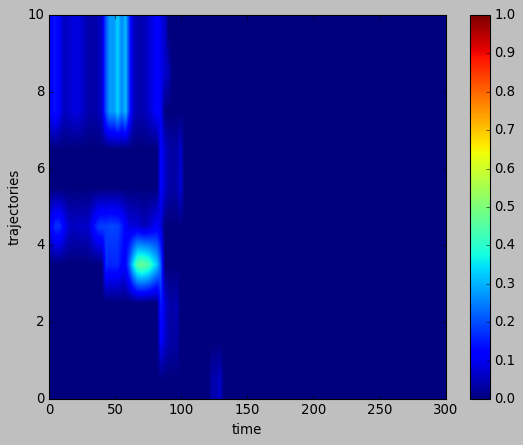

In [55]:
#Select ten cell trajectiories with the smallest periods and plot those as a heat map 
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(tentrajectories.T, extent=[0,300,0,10], aspect='auto',origin='lower', 
          cmap="jet")
plotter.xlabel('time')
plotter.ylabel('trajectories')
plotter.colorbar()
plotter.clim(0,1)

#change the function to put the time vector below, que arriba lo hace automáticamente pero aquí no, put a function the matioetc
#just plot the traces with the minival period - highest freq